## This is the Baseline Data Processing

# 1. Load Library

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
plt.style.use('ggplot')
# this is pandas table width setting
pd.set_option('display.max_columns', None)  

# 2. Data Processing

## 2.A Load Data

In [171]:
# load all files into data
# drop the last two columns which are 'na' for train & test data
# drop the last one column which are 'na' for RUL data (ground truth)

allfile = [i+str(j)+'.txt' for i in ['data/'+item for item in ['train_FD00','test_FD00','RUL_FD00']] for j in range(1,4+1)]
data = [pd.read_csv(file, sep=' ', header=None) for file in allfile]
[f.drop(f.columns[[-1, -2]], axis=1, inplace=True) for f in data[0:8]]
[t.drop(t.columns[[-1]], axis=1, inplace=True) for t in data[8:12]]
header = ['id','cycle'] + ['setting'+str(i) for i in range(1,3+1)] + ['sensor'+str(j) for j in range(1,21+1)]
for k in range(8): data[k].columns = header

#### shape of the data sets

In [172]:
pd.DataFrame(np.array([[np.shape(dd)[0] for dd in data], [np.shape(ff)[1] for ff in data]]),
             index=['#columns', '#rows'], columns=[string + str(h) for string in ['train','test','URL'] for h in range(1,4+1)])

,train1,train2,train3,train4,test1,test2,test3,test4,URL1,URL2,URL3,URL4
#columns,20631,53759,24720,61249,13096,33991,16596,41214,100,259,100,248
#rows,26,26,26,26,26,26,26,26,1,1,1,1


#### review data information in train1

In [173]:
data[0].describe()

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## 2.B Create Labels

In [174]:
# number of warning cycle
# w1 gives warning at 30 cycles before eol (end of life)
# w2 gives 15

w1, w2 = 30, 15

#### Training data

In [175]:
# add columns of ;rul' (remaining useful life) = 'max' - 'cycle', for regression
# w1 = 1 on 30 remaining time series, for binary classification
# w2 = 1 on 30 remaining time series and 2 on 15 time series, for multi-class classification

for item in data[0:4]:
    item['rul'] = item.groupby('id')['cycle'].transform('max') - item['cycle']
    item['w1'] = np.where(item['rul'] > w1, 0, 1)
    item['w2'] = np.where(item['rul'] > w2, 0, 1)
    item['w2'] = item['w2'] + item['w1']

In [176]:
data[0][0:1]

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul,w1,w2
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.419,191,0,0


#### Testing data

In [177]:
# handle ground truth data first

for tru in data[8:12]:
    tru.columns = ['truth']
    tru['id'] = tru.index + 1

In [178]:
# testing data 'rul' considers ground truth data from RUL_FD00*.txt
# 'index + 4' means moving from test data to RUL data

for index in range(4,8):
    data[index] = data[index].merge(data[index+4], on=['id'], how='left')
    data[index]['rul'] = data[index].groupby('id')['cycle'].transform('max') + data[index]['truth'] - data[index]['cycle']
    data[index]['w1'] = np.where(data[index]['rul'] > w1, 0, 1)
    data[index]['w2'] = np.where(data[index]['rul'] > w2, 0, 1)
    data[index]['w2'] = data[index]['w2'] + data[index]['w1']
    data[index].drop(['truth'], axis = 1, inplace=True)

In [179]:
data[5][data[5]['rul']<18][0:3]

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul,w1,w2
709,5,146,42.0048,0.8414,100.0,445.00,550.31,1360.89,1131.67,3.91,5.72,138.93,2212.94,8381.07,1.02,42.35,130.43,2389.05,8144.01,9.3877,0.02,332,2212,100.00,10.44,6.3453,17,1,1
710,5,147,25.0023,0.6204,60.0,462.54,537.16,1266.46,1054.05,7.05,9.03,175.56,1916.25,8052.33,0.94,37.01,164.06,2029.27,7923.93,10.9528,0.02,310,1915,84.93,14.15,8.5077,16,1,1
711,5,148,42.0055,0.8400,100.0,445.00,550.81,1358.95,1140.34,3.91,5.72,138.42,2212.90,8391.57,1.02,42.43,130.82,2389.06,8140.94,9.3964,0.02,333,2212,100.00,10.34,6.3601,15,1,2


#### Baseline data is ready

In [180]:
# assign to separate data sets for easier to manage
train1,train2,train3,train4, test1,test2,test3,test4, RUL1,RUL2,RUL3,RUL4 = data

In [181]:
train1[0:1]

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul,w1,w2
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.419,191,0,0


In [182]:
test1[0:1]

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul,w1,w2
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0,0


In [183]:
RUL1[0:1]

,truth,id
0,112,1


## 2.C Explore the Data in Time Series

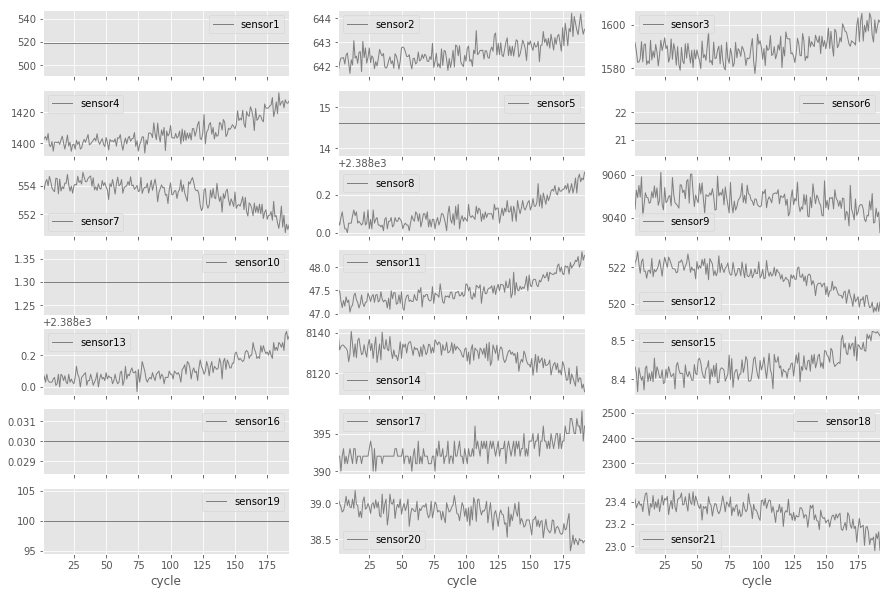

In [82]:
# look at one group of training sensor data over cycle time 

_, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
for index, ax in enumerate(axes.ravel()):
    train1[train1['id']==1].plot(x='cycle', y='sensor'+str(index+1), ax=ax, color='gray', linewidth=1)
plt.show()

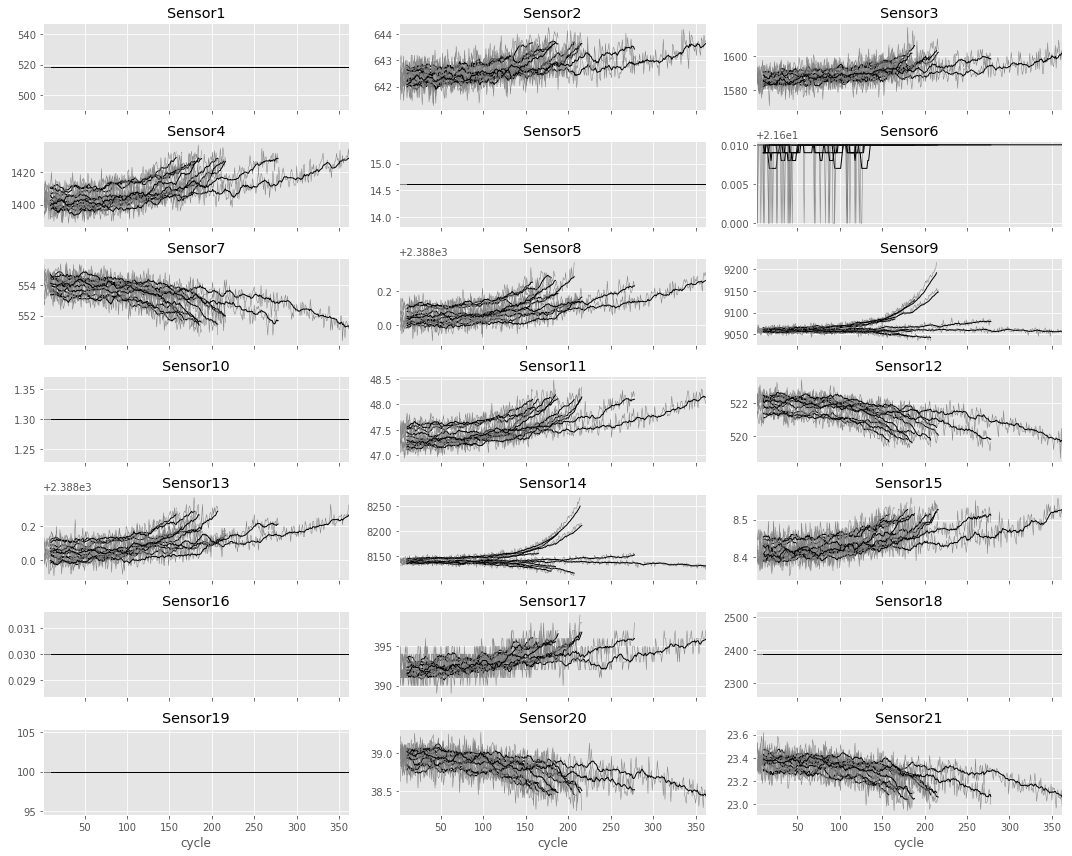

In [80]:
# look at 10 groups of sensor data over training cycle
# give insights to noise filter using moving average, will use in optimization phase

np.random.seed(1234)
random10 = np.random.choice(train1['id'].unique(), size=10, replace=False)
train1_random10 = train1[train1['id'].isin(random10)].copy()

_, axes1 = plt.subplots(7, 3, figsize=(15, 12), sharex=True)
for index1, ax1 in enumerate(axes1.ravel()):
    for unit_id, group in train1_random10.groupby('id'):
        (group
            .plot(x='cycle', y='sensor'+str(index1+1), ax=ax1, color='gray', linewidth=0.5, legend=False))
        (group
            .rolling(window=10, on = 'cycle')
            .mean()
            .plot(x='cycle', y='sensor'+str(index1+1), ax=ax1, color='black', linewidth=1, legend=False))
    ax1.set_title(('sensor'+str(index1+1)).title())

plt.tight_layout()
plt.show()

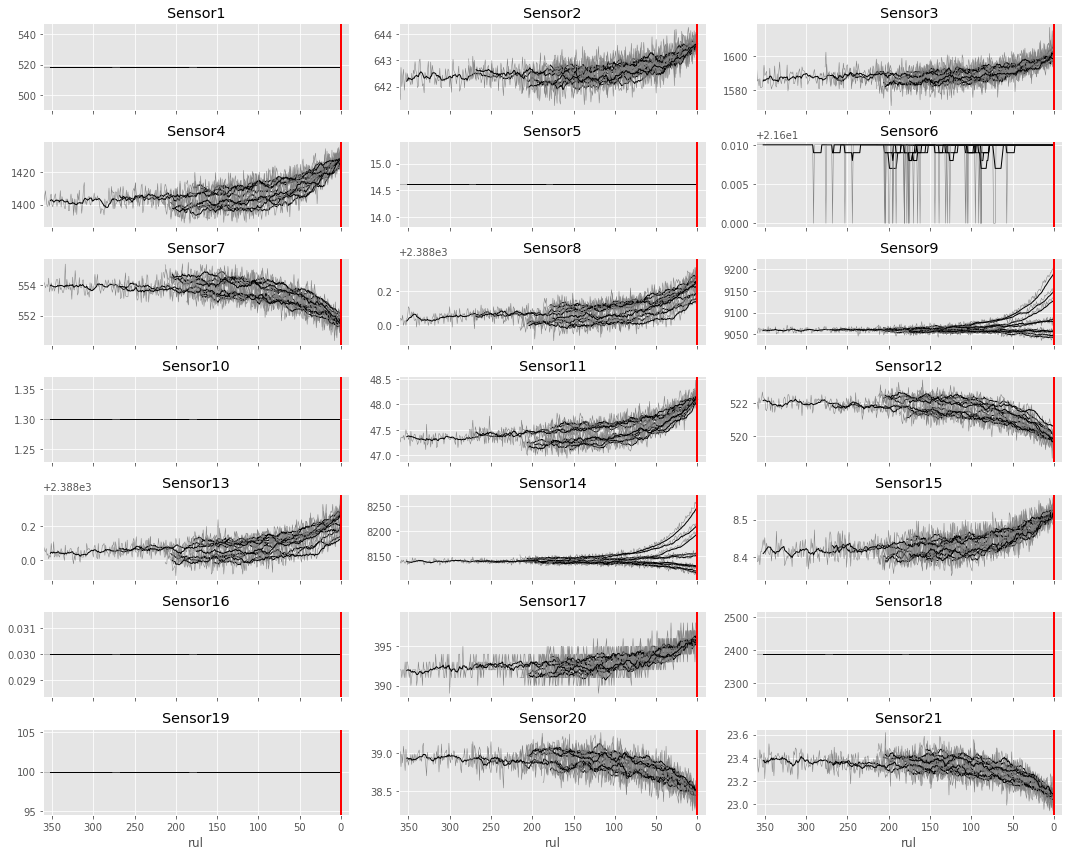

In [83]:
# look at 10 groups of sensor data till end of life
# red line is end of life

_, axes2 = plt.subplots(7, 3, figsize=(15, 12), sharex=True)
for index2, ax2 in enumerate(axes2.ravel()):
    for unit_id2, group2 in train1_random10.groupby('id'):
        (group2
            .plot(x='rul', y='sensor'+str(index2+1), ax=ax2, color='gray', linewidth=0.5, legend=False))
        (group2
            .rolling(window=10, on = 'rul')
            .mean()
            .plot(x='rul', y='sensor'+str(index2+1), ax=ax2, color='black', linewidth=1, legend=False))
    ax2.set_title(('sensor'+str(index2+1)).title())
    ax2.axvline(x=0, color='r', linestyle='solid', linewidth=2)
    ax2.set_xlim(train1_random10['rul'].max(), -10)
    
plt.tight_layout()
plt.show()

# 3. Dave Data

## 3.A Save Raw Features

In [189]:
train1.to_pickle('data/train1.pkl')
test1.to_pickle('data/test1.pkl')

## 3.B Rolling Average

In [185]:
train1_f, test1_f = train1.iloc[:,0:26].copy(), test1.iloc[:,0:26].copy()

In [186]:
# rolling window = 5

train1_r5 = train1_f.groupby(['id']).apply(lambda x: x.rolling(window=5, min_periods=1).mean())
test1_r5 = test1_f.groupby(['id']).apply(lambda x: x.rolling(window=5, min_periods=1).mean())
train1_r5 = pd.concat([train1_r5, train1.iloc[:,26:29]], axis=1)
test1_r5 = pd.concat([test1_r5, test1.iloc[:,26:29]], axis=1)
train1_r5.to_pickle('data/train1_r5.pkl')
test1_r5.to_pickle('data/test1_r5.pkl')

## 3.C Rolling + Normalization

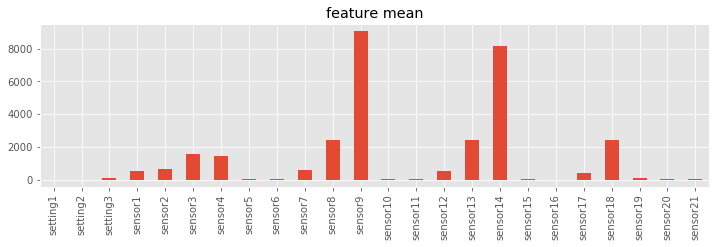

In [199]:
# the features are in quite different scales, makes sense to normalize

train1_r5.iloc[:, 2:26][features].mean().plot(kind='bar', figsize=(12,3), title='feature mean')

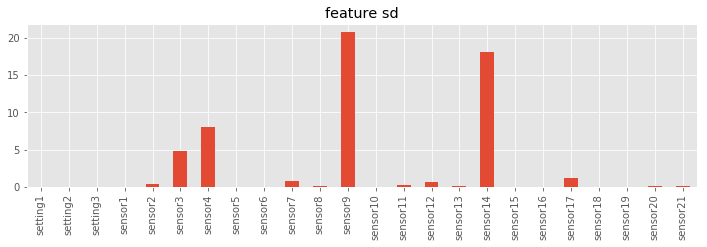

In [198]:
train1_r5.iloc[:, 2:26][features].std().plot(kind='bar', figsize=(12,3), title='feature sd')

In [226]:
from sklearn import preprocessing
scaler_train = preprocessing.MinMaxScaler()
scaler_test = preprocessing.MinMaxScaler()
train1_r5_norm = pd.DataFrame(scaler_train.fit_transform(train1_r5.iloc[:,2:29]), columns=train1_r5.columns[2:29])
test1_r5_norm = pd.DataFrame(scaler_test.fit_transform(test1_r5.iloc[:,2:29]), columns=test1_r5.columns[2:29])
train1_r5_norm = pd.concat([train1[['id','cycle']], train1_r5_norm], axis=1) 
test1_r5_norm = pd.concat([test1[['id','cycle']], test1_r5_norm], axis=1) 

In [232]:
train1_r5_norm.to_pickle('data/train1_r5_norm.pkl')
test1_r5_norm.to_pickle('data/test1_r5_norm.pkl')

## This is the end of baseline data processing